<a href="https://colab.research.google.com/github/jaco-uoeo/ml-artefact/blob/main/Unit06/k-means-iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# @title Dependencies
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.cluster import KMeans

In [21]:
# @title Load data

df = pd.read_csv("https://raw.githubusercontent.com/jaco-uoeo/ml-artefact/refs/heads/main/Unit06/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [22]:
# @title Pre-processing

# drop rows with missing values
df.dropna(inplace=True)

# extract features and labels
X = df.iloc[:, :-1].values
y = df['species'].values

# encode string labels to numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

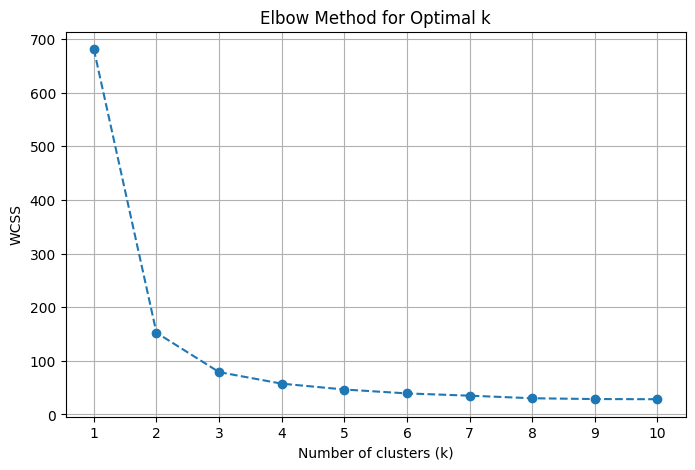

In [23]:
# @title Determine Clusters

wcss = []  # Within-Cluster-Sum-of-Squares

# Try k values from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()




In [24]:
# @title K-Means

# we see from the elbow plot that 3 is the most optimal (we already knwe it based on 'species' but is good to check)

kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

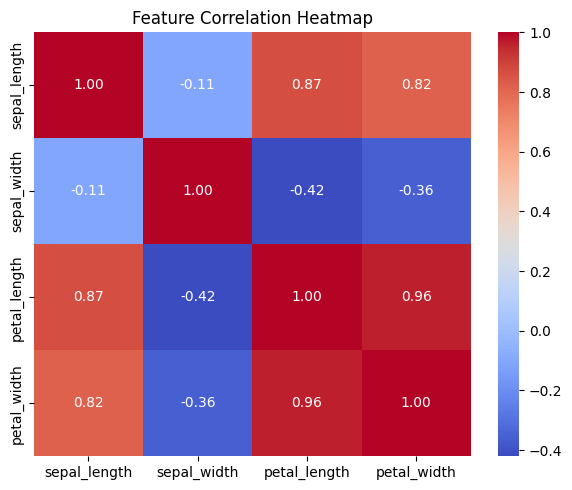

In [25]:
# @title Correlation

corr_matrix = df.iloc[:, :-1].corr()

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

In [26]:
# @title Confusion Matrix

# Create confusion matrix to analyze clustering results
conf_matrix = confusion_matrix(y_encoded, y_kmeans)
conf_df = pd.DataFrame(conf_matrix,
                       index=[f"True {label}" for label in label_encoder.classes_],
                       columns=[f"Cluster {i}" for i in range(3)])

print("Confusion Matrix:")
print(conf_df)

aligned_labels = np.zeros_like(y_kmeans)
for cluster in range(3):
    mask = (y_kmeans == cluster)
    aligned_labels[mask] = mode(y_encoded[mask], keepdims=False).mode

Confusion Matrix:
                 Cluster 0  Cluster 1  Cluster 2
True setosa              0         50          0
True versicolor          3          0         47
True virginica          36          0         14


In [27]:
# @title Evaluate

accuracy = accuracy_score(y_encoded, aligned_labels)
print(f"\nAccuracy after alignment: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_encoded, aligned_labels, target_names=label_encoder.classes_))


Accuracy after alignment: 0.89

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.77      0.94      0.85        50
   virginica       0.92      0.72      0.81        50

    accuracy                           0.89       150
   macro avg       0.90      0.89      0.89       150
weighted avg       0.90      0.89      0.89       150

